# Brazilian E-Commerce Public Dataset by Olist
### 100,000 Orders with product, customer and reviews info
####  
### Data Science project from Kaggle: 
https://www.kaggle.com/olistbr/brazilian-ecommerce

#### 
### Task description
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.
#### 

### Load dataset

In [1]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load datasets
customers = pd.read_csv('dataset/customers.csv')
sellers = pd.read_csv('dataset/sellers.csv')
products = pd.read_csv('dataset/products.csv')
orders = pd.read_csv('dataset/orders.csv')
order_items = pd.read_csv('dataset/order_items.csv')
order_payments = pd.read_csv('dataset/order_payments.csv')
product_category_name_translation = pd.read_csv('dataset/product_category_name_translation.csv')
geolocation = pd.read_csv('dataset/geolocation.csv')

In [3]:
# check the head of datasets
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# print the basic information of each datasets
datasets = {'customers':customers,'sellers':sellers,'products':products,'orders':orders,
            'order_items':order_items,'order_payments':order_payments,'geolocation':geolocation,
            'product_category_name_translation':product_category_name_translation}

for dataset in datasets.keys():
    print(datasets[dataset].shape,'\n',datasets[dataset].info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
(99441, 5) 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3

In [12]:
# firstly we need english name of product category instead of original name
products_data = pd.merge(products, product_category_name_translation, on='product_category_name', how='left')

# Delete 'product_category_name' column and rename the column
del products_data['product_category_name']

products_data.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [13]:
products_data.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [14]:
# merge all dataframes into one
data = pd.merge(orders, customers, on='customer_id')
data = data.merge(order_items, on='order_id')
data = data.merge(order_payments, on='order_id')
data = data.merge(products_data, on='product_id')
data = data.merge(sellers, on='seller_id')

data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [15]:
# check the columns it contains
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  order_item_id                 

#### 
### Feature description

customer_id: key to the orders dataset. Each order has a unique customer_id.

customer_unique_id:unique identifier of a customer.

customer_zip_code_prefix：first five digits of customer zip code

customer_city：customer city name

customer_state：customer state

geolocation_zip_code: first 5 digits of zip code

geolocation_lat: latitude

geolocation_lng: longitude

geolocation_city: city name

geolocation_state: state

order_id: order unique identifier

order_item_id: sequential number identifying number of items included in the same order.

product_id: product unique identifier

seller_id:seller unique identifier

shipping_limit_date：Shows the seller shipping limit date for handling the order over to the logistic partner.

price：item price

freight_value：item freight value item (if an order has more than one item the freight value is splitted between items)

order_id: unique identifier of an order.

payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.

payment_type: method of payment chosen by the customer.

payment_installments: number of installments chosen by the customer.

payment_value: transaction value.

customer_id: key to the customer dataset. Each order has a unique customer_id.

order_status: Reference to the order status (delivered, shipped, etc).

order_purchase_timestamp: Shows the purchase timestamp.

order_approved_at: Shows the payment approval timestamp.

order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner.

order_delivered_customer_date: Shows the actual order delivery date to the customer.

order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment

product_name_lenght：number of characters extracted from the product name.

product_description_lenght: number of characters extracted from the product description.

product_photos_qty: number of product published photos

product_weight_g: product weight measured in grams.

product_length_cm: product length measured in centimeters.

product_height_cm: product height measured in centimeters.

product_width_cm: product width measured in centimeters.

seller_id: seller unique identifier

seller_zip_code_prefix: first 5 digits of seller zip code

seller_city: seller city name

seller_state: seller state

product_category_name: category name in English

#### 
### Data cleaning and feature engineering

### Handle Missing value

In [17]:
# check some basic information

def unqiue_element(x):
    a = len(np.unique(x))
    return a

df_eda = pd.DataFrame(
    [data.dtypes, data.astype(str).apply(unqiue_element), 
    data.isnull().sum()/data.shape[0]]
    ).T

df_eda.columns = ['Data Type', 'Unique Value', 'Percentage of NA']
df_eda

,Data Type,Unique Value,Percentage of NA
order_id,object,98665,0
customer_id,object,98665,0
order_status,object,7,0
order_purchase_timestamp,object,98111,0
order_approved_at,object,90174,0.00012755
order_delivered_carrier_date,object,81017,0.0105866
order_delivered_customer_date,object,95664,0.021828
order_estimated_delivery_date,object,449,0
customer_unique_id,object,95419,0
customer_zip_code_prefix,int64,14976,0


<AxesSubplot:>

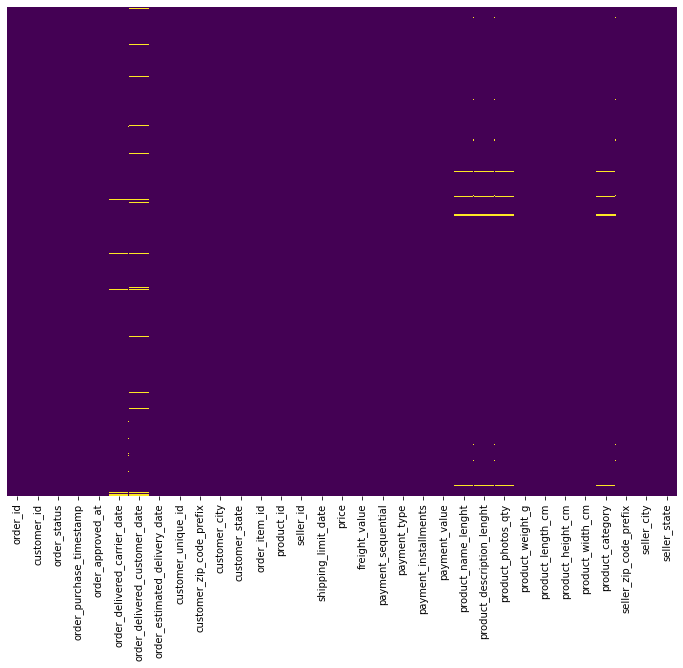

In [18]:
# plot the missing value using heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# it may cause missing data if the order is unavailable or canceled
data['order_status'].value_counts()

delivered      115035
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [20]:
# do some encoding
data['order_status'].replace({'approved':'processing','unavailable':'canceled'},inplace=True)

In [21]:
# show the missing data of each order status
for status in data['order_status'].unique():
    status_subset = data[data['order_status']==status]
    print(status,len(status_subset),'\n',
          status_subset.isnull().sum()[status_subset.isnull().sum()>0].sort_values(ascending=False),'\n')

delivered 115035 
 product_category                 1651
product_photos_qty               1628
product_description_lenght       1628
product_name_lenght              1628
product_width_cm                   20
product_height_cm                  20
product_length_cm                  20
product_weight_g                   20
order_approved_at                  15
order_delivered_customer_date       8
order_delivered_carrier_date        2
dtype: int64 

shipped 1244 
 order_delivered_customer_date    1244
product_category                   30
product_photos_qty                 30
product_description_lenght         30
product_name_lenght                30
dtype: int64 

canceled 573 
 order_delivered_customer_date    566
order_delivered_carrier_date     494
product_category                  17
product_photos_qty                15
product_description_lenght        15
product_name_lenght               15
dtype: int64 

invoiced 371 
 order_delivered_customer_date    371
order_delivered_carrier_

In [22]:
# missing values are related to the order status,espeicially "delivered date"
# drop all missing data except for date and time feature

data = data.dropna(subset=['product_category','product_name_lenght','product_photos_qty',
                           'product_description_lenght','product_width_cm',
                           'product_height_cm','product_length_cm','product_weight_g'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115877 entries, 0 to 117600
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115877 non-null  object 
 1   customer_id                    115877 non-null  object 
 2   order_status                   115877 non-null  object 
 3   order_purchase_timestamp       115877 non-null  object 
 4   order_approved_at              115863 non-null  object 
 5   order_delivered_carrier_date   114672 non-null  object 
 6   order_delivered_customer_date  113382 non-null  object 
 7   order_estimated_delivery_date  115877 non-null  object 
 8   customer_unique_id             115877 non-null  object 
 9   customer_zip_code_prefix       115877 non-null  int64  
 10  customer_city                  115877 non-null  object 
 11  customer_state                 115877 non-null  object 
 12  order_item_id                 

#### 
### Seperate train and test set

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(labels='product_category',axis=1)
y = data['product_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

X_train.shape, X_test.shape

((81113, 32), (34764, 32))


### Categorical encoding

In [25]:
# check the data type of each columns
for col in X_train.columns:
    print(col,": ",X_train[col].dtype)

# make list of variables types

# numerical: discrete and continuous
discrete = [var for var in X_train.columns if X_train[var].dtype!='O'and X_train[var].nunique()<10]
continuous = [var for var in X_train.columns if X_train[var].dtype!='O'and var not in discrete]

# categorical
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('\nThere are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

order_id :  object
customer_id :  object
order_status :  object
order_purchase_timestamp :  object
order_approved_at :  object
order_delivered_carrier_date :  object
order_delivered_customer_date :  object
order_estimated_delivery_date :  object
customer_unique_id :  object
customer_zip_code_prefix :  int64
customer_city :  object
customer_state :  object
order_item_id :  int64
product_id :  object
seller_id :  object
shipping_limit_date :  object
price :  float64
freight_value :  float64
payment_sequential :  int64
payment_type :  object
payment_installments :  int64
payment_value :  float64
product_name_lenght :  float64
product_description_lenght :  float64
product_photos_qty :  float64
product_weight_g :  float64
product_length_cm :  float64
product_height_cm :  float64
product_width_cm :  float64
seller_zip_code_prefix :  int64
seller_city :  object
seller_state :  object

There are 0 discrete variables
There are 15 continuous variables
There are 17 categorical variables


In [26]:
# In this section we handle categorical variables
categorical

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'payment_type',
 'seller_city',
 'seller_state']

In [27]:
# all id features are not helpful for the prediction, we can drop these columns
ID = ['order_id', 'customer_id','order_item_id','customer_unique_id', 'product_id', 'seller_id']
X_train.drop(labels=ID,axis=1,inplace=True)
X_test.drop(labels=ID,axis=1,inplace=True)

E:\Informatik\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
# encode the features city and state
from feature_engine.encoding import OneHotEncoder

ohe_enc_1 = OneHotEncoder(
    top_categories = 6, drop_last=True,
    variables=['customer_city','customer_state','seller_city','seller_state'])

ohe_enc_1.fit(X_train)

OneHotEncoder(drop_last=True, top_categories=6,
              variables=['customer_city', 'customer_state', 'seller_city',
                         'seller_state'])

In [29]:
# observations per category for each variable
ohe_enc_1.encoder_dict_

{'customer_city': ['sao paulo',
  'rio de janeiro',
  'belo horizonte',
  'brasilia',
  'curitiba',
  'campinas'],
 'customer_state': ['SP', 'RJ', 'MG', 'RS', 'PR', 'SC'],
 'seller_city': ['sao paulo',
  'ibitinga',
  'curitiba',
  'santo andre',
  'sao jose do rio preto',
  'belo horizonte'],
 'seller_state': ['SP', 'MG', 'PR', 'RJ', 'SC', 'RS']}

In [30]:
X_train = ohe_enc_1.transform(X_train)
X_test = ohe_enc_1.transform(X_test)

In [31]:
# feature zip code is duplicated, we can drop it
X_train.drop('customer_zip_code_prefix',axis=1,inplace=True)
X_test.drop('customer_zip_code_prefix',axis=1,inplace=True)
X_train.drop('seller_zip_code_prefix',axis=1,inplace=True)
X_test.drop('seller_zip_code_prefix',axis=1,inplace=True)

In [32]:
# encode the features order_Status
X_train['order_status'].value_counts()

delivered     79361
shipped         846
canceled        395
processing      258
invoiced        253
Name: order_status, dtype: int64

In [33]:
# replace the outliers
X_train['order_status'].replace(['approved','unavailable'],'processing',inplace=True)

In [34]:
# convert into numerical value
from feature_engine.encoding import OneHotEncoder

ohe_enc_status = OneHotEncoder(drop_last=True,variables=['order_status','payment_type'])

ohe_enc_status.fit(X_train)

OneHotEncoder(drop_last=True, variables=['order_status', 'payment_type'])

In [35]:
X_train = ohe_enc_status.transform(X_train)
X_test = ohe_enc_status.transform(X_test)

In [36]:
# encode the time value
import datetime

def dt_transform(dataset,columns):
    for col in columns:
        dataset[col] = pd.to_datetime(dataset[col])

time_features = ['order_purchase_timestamp','shipping_limit_date','order_delivered_customer_date',
                 'order_estimated_delivery_date','order_approved_at','order_delivered_carrier_date']

In [37]:
dt_transform(X_train,time_features)
dt_transform(X_test,time_features)

In [38]:
# introduce a new feature
X_train['order_month'] = X_train['order_purchase_timestamp'].dt.month
X_test['order_month'] = X_test['order_purchase_timestamp'].dt.month

In [39]:
X_train['Shipping days'] =  (X_train['order_delivered_customer_date'] - X_train['order_purchase_timestamp']).dt.days
X_test['Shipping days'] =  (X_test['order_delivered_customer_date'] - X_test['order_purchase_timestamp']).dt.days

X_train['On time delivery'] = (X_train['order_delivered_customer_date'] - X_train['order_estimated_delivery_date']).dt.days
X_test['On time delivery'] = (X_test['order_delivered_customer_date'] - X_test['order_estimated_delivery_date']).dt.days

In [40]:
# replace the missing value with the mean value
X_train['On time delivery'].fillna(value=X_train['On time delivery'].mean(),inplace=True)
X_test['On time delivery'].fillna(value=X_train['On time delivery'].mean(),inplace=True)

X_train['Shipping days'].fillna(value=X_train['Shipping days'].mean(),inplace=True)
X_test['Shipping days'].fillna(value=X_train['Shipping days'].mean(),inplace=True)

In [41]:
# convert values in feature "on time delivery" into binary variables
X_train['On time delivery'] = X_train['On time delivery']<0
X_test['On time delivery'] = X_test['On time delivery']<0

X_train['On time delivery'].replace({True:1,False:0},inplace=True)
X_train['On time delivery'].replace({True:1,False:0},inplace=True)

In [42]:
X_train[['Shipping days','On time delivery']].isnull().sum()

Shipping days       0
On time delivery    0
dtype: int64

In [43]:
# delete the time columns

X_train.drop(labels=time_features,axis=1,inplace=True)
X_test.drop(labels=time_features,axis=1,inplace=True)

In [44]:
X_train.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,...,order_status_delivered,order_status_shipped,order_status_canceled,order_status_processing,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,order_month,Shipping days,On time delivery
18377,15.49,7.39,1,1,68.64,59.0,1782.0,1.0,125.0,25.0,...,1,0,0,0,1,0,0,6,5.0,1
92211,199.90,21.89,1,1,221.79,58.0,904.0,1.0,3550.0,35.0,...,1,0,0,0,1,0,0,2,36.0,0
78122,125.02,12.21,1,6,137.23,53.0,1140.0,3.0,1600.0,18.0,...,1,0,0,0,0,1,0,5,6.0,1
60139,248.99,74.69,1,1,323.68,53.0,526.0,2.0,18050.0,75.0,...,1,0,0,0,1,0,0,1,7.0,1
24701,29.00,14.10,1,3,86.20,55.0,167.0,3.0,200.0,16.0,...,1,0,0,0,0,1,0,10,9.0,1


In [45]:
for i in X_train.columns:
    print(i,':',X_train[i].value_counts())

price : 59.90     1805
69.90     1485
49.90     1420
89.90     1113
99.90     1078
          ... 
121.75       1
820.05       1
109.73       1
109.77       1
141.75       1
Name: price, Length: 5136, dtype: int64
freight_value : 15.10     2613
7.78      1621
11.85     1387
14.10     1353
18.23     1118
          ... 
98.35        1
237.84       1
46.57        1
74.51        1
93.14        1
Name: freight_value, Length: 6259, dtype: int64
payment_sequential : 1     77683
2      2287
3       456
4       217
5       116
6        84
7        62
8        41
9        36
10       25
11       21
12       18
13       10
15       10
14        8
18        7
16        6
17        5
19        5
20        5
21        3
22        2
25        2
27        1
23        1
26        1
28        1
Name: payment_sequential, dtype: int64
payment_installments : 1     40456
2      9310
3      8112
4      5558
10     4718
5      4219
8      3477
6      3201
7      1259
9       504
12      111
15       68
18     

#### 
### Outlier Engineering

In [46]:
# show all int and float values
X_train.select_dtypes(['int','float']).columns

Index(['price', 'freight_value', 'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_city_sao paulo', 'customer_city_rio de janeiro',
       'customer_city_belo horizonte', 'customer_city_brasilia',
       'customer_city_curitiba', 'customer_city_campinas', 'customer_state_SP',
       'customer_state_RJ', 'customer_state_MG', 'customer_state_RS',
       'customer_state_PR', 'customer_state_SC', 'seller_city_sao paulo',
       'seller_city_ibitinga', 'seller_city_curitiba',
       'seller_city_santo andre', 'seller_city_sao jose do rio preto',
       'seller_city_belo horizonte', 'seller_state_SP', 'seller_state_MG',
       'seller_state_PR', 'seller_state_RJ', 'seller_state_SC',
       'seller_state_RS', 'order_status_delivered', 'order_status_shipped',
       'order_status_canceled', 'order_status_processing',
       'payment_type_bol

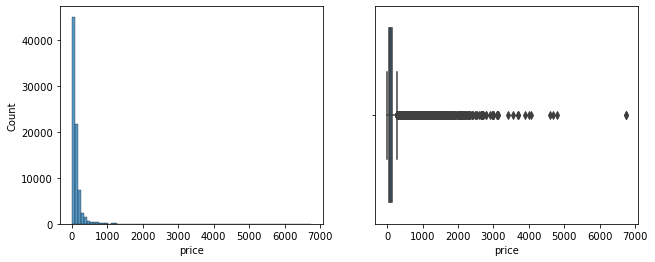

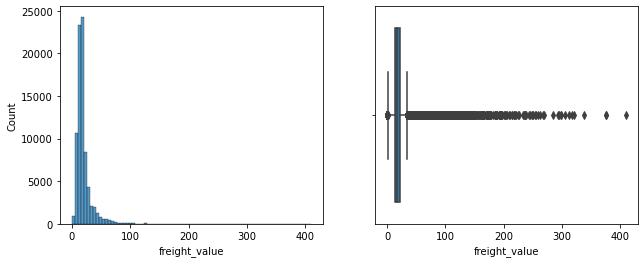

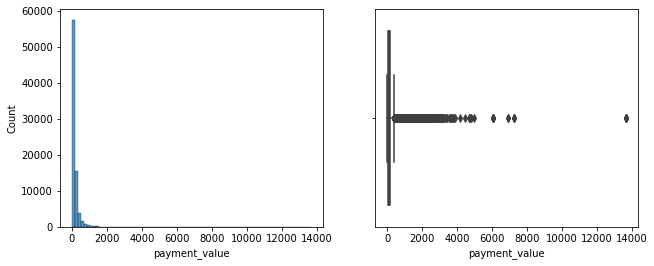

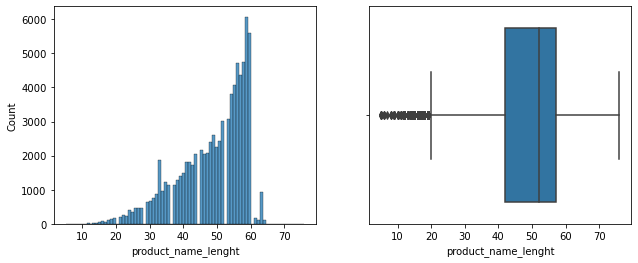

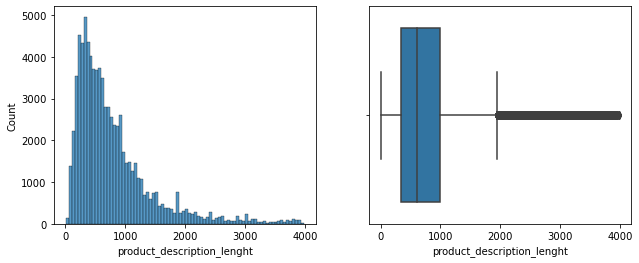

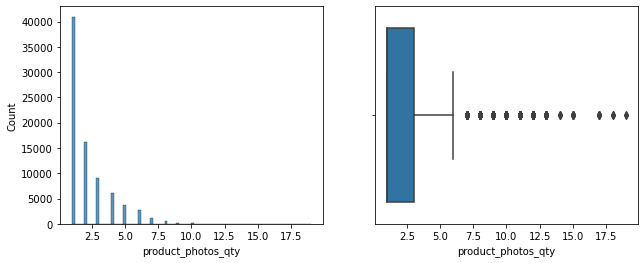

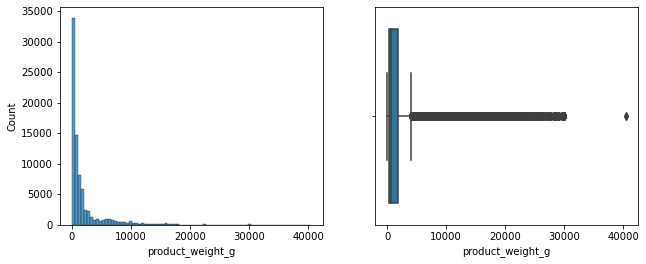

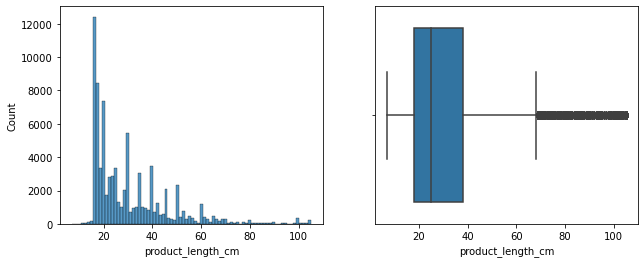

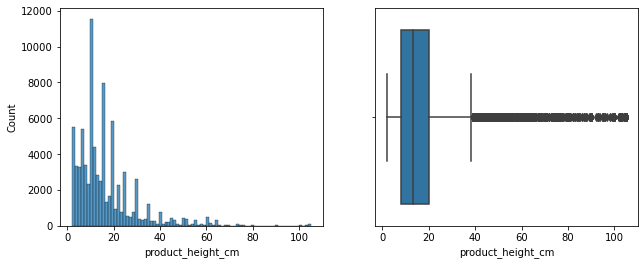

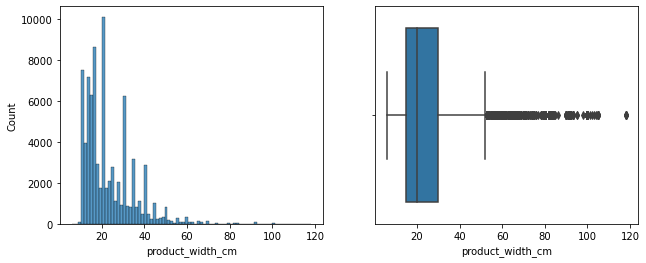

In [47]:
# show the distribution of each continuous features
for feature in ['price','freight_value','payment_value','product_name_lenght','product_description_lenght',
                'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature,data=X_train,bins=80)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature,data=X_train)

In [48]:
# import library to handle the outliers
from feature_engine.outliers import ArbitraryOutlierCapper

capper = ArbitraryOutlierCapper(max_capping_dict={'price':400,'freight_value':35,'payment_value':500,
                                                 'product_description_lenght':1000,'product_photos_qty':6,
                                                  'product_weight_g':4000,'product_length_cm':65,'product_height_cm':37,
                                                  'product_width_cm':50},min_capping_dict={'product_name_lenght':20})
capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'freight_value': 35,
                                         'payment_value': 500, 'price': 400,
                                         'product_description_lenght': 1000,
                                         'product_height_cm': 37,
                                         'product_length_cm': 65,
                                         'product_photos_qty': 6,
                                         'product_weight_g': 4000,
                                         'product_width_cm': 50},
                       min_capping_dict={'product_name_lenght': 20})

In [49]:
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)

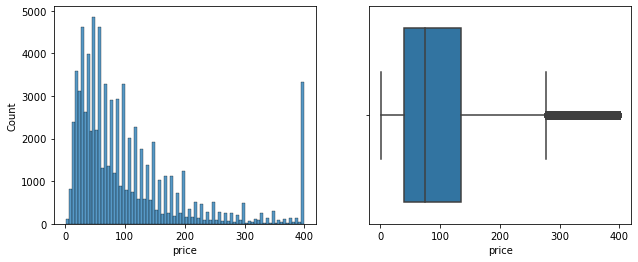

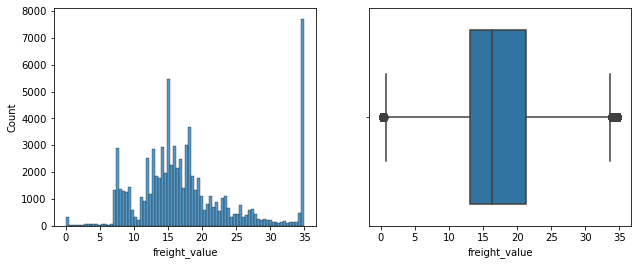

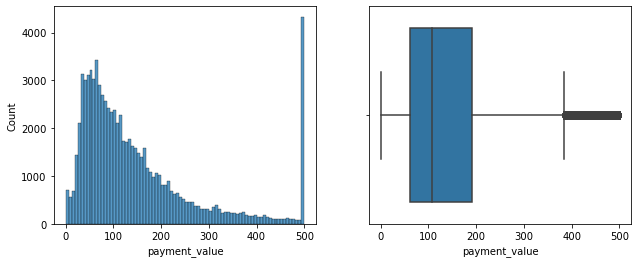

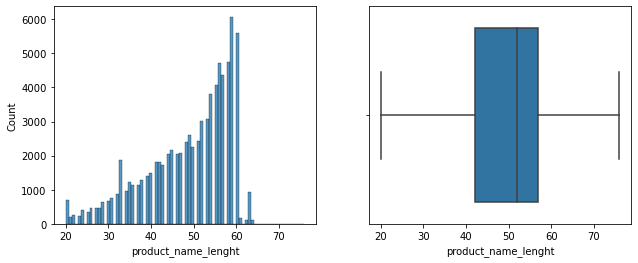

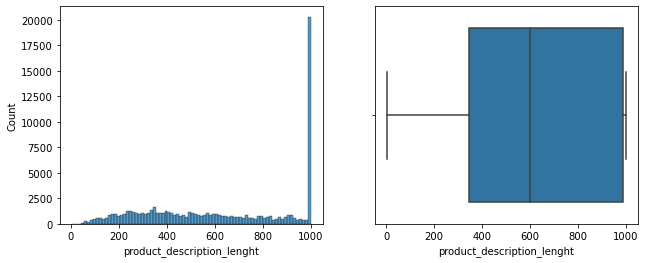

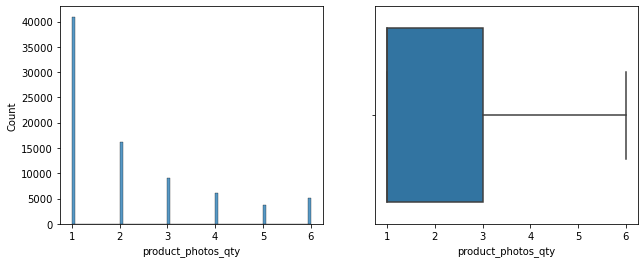

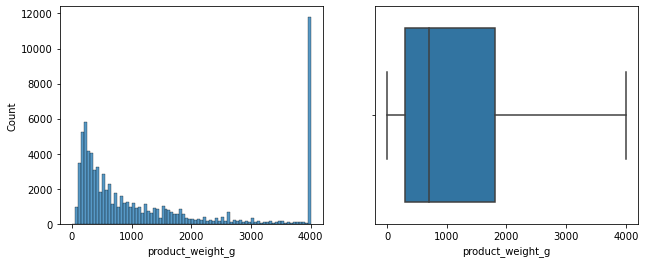

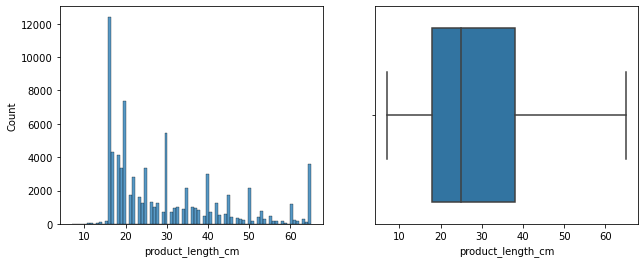

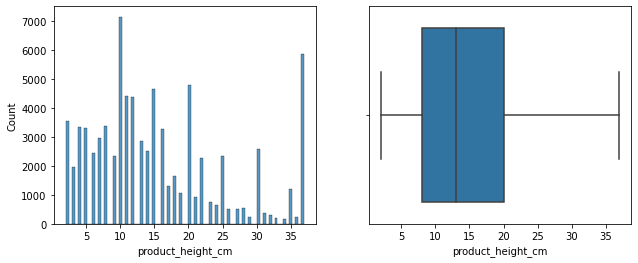

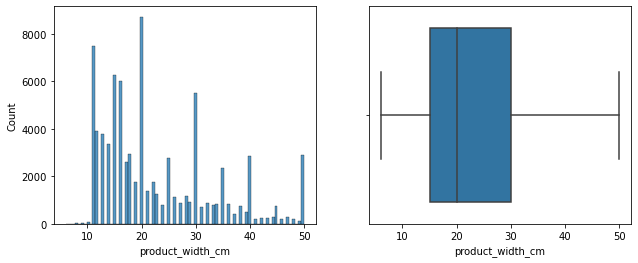

In [50]:
# show the distribution of each continuous features
for feature in ['price','freight_value','payment_value','product_name_lenght','product_description_lenght',
                'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature,data=X_train,bins=80)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature,data=X_train)

#### 
### Feature Selection with feature engine

In [51]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features) # there are no constant features

[]


In [52]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [53]:
# print the number of quasi-constant features

quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant),quasi_constant

(2,
 Index(['order_status_canceled', 'order_status_processing'], dtype='object'))

In [54]:
# show the percentage of quasi-constant values
for feature in quasi_constant:
    print(feature, '\n', X_train[feature].value_counts()/np.float(len(X_train)),'\n')

order_status_canceled 
 0    0.99513
1    0.00487
Name: order_status_canceled, dtype: float64 

order_status_processing 
 0    0.996819
1    0.003181
Name: order_status_processing, dtype: float64 



In [55]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40


0

In [56]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

correlated features:  0


In [57]:
y_train.unique()

array(['health_beauty', 'auto', 'luggage_accessories', 'watches_gifts',
       'housewares', 'perfumery', 'bed_bath_table', 'sports_leisure',
       'computers_accessories', 'toys', 'furniture_decor', 'stationery',
       'home_confort', 'telephony', 'office_furniture', 'baby',
       'cool_stuff', 'food', 'fashion_shoes', 'small_appliances',
       'cine_photo', 'garden_tools', 'drinks', 'electronics',
       'construction_tools_construction', 'food_drink',
       'industry_commerce_and_business', 'books_imported', 'pet_shop',
       'fashion_bags_accessories', 'consoles_games', 'home_appliances',
       'kitchen_dining_laundry_garden_furniture',
       'agro_industry_and_commerce', 'fashion_underwear_beach',
       'fixed_telephony', 'audio', 'air_conditioning', 'flowers',
       'computers', 'tablets_printing_image', 'construction_tools_safety',
       'fashion_male_clothing', 'musical_instruments',
       'costruction_tools_tools', 'party_supplies',
       'furniture_living_room', 

<AxesSubplot:xlabel='product_category', ylabel='Count'>

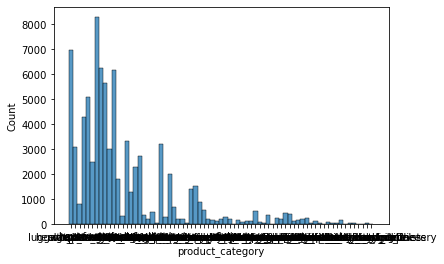

In [58]:
# check the categories of y_train
sns.histplot(x=y_train,bins=100)

In [59]:
print(y_train.value_counts()/len(y_train))

print('\nNumbers of categories: ',y_train.nunique(),
    '\nNumbers of rare categories: ',
      sum(y_train.value_counts()/len(y_train)<0.01))

bed_bath_table               0.102252
health_beauty                0.085843
sports_leisure               0.077152
furniture_decor              0.076079
computers_accessories        0.069779
                               ...   
arts_and_craftmanship        0.000197
cds_dvds_musicals            0.000173
la_cuisine                   0.000173
fashion_childrens_clothes    0.000062
security_and_services        0.000025
Name: product_category, Length: 71, dtype: float64

Numbers of categories:  71 
Numbers of rare categories:  50


In [60]:
# encode the rare categories in y_train
rare_cat = list(y_train.value_counts()[y_train.value_counts()/len(y_train)<0.01].index)

y_train.replace(rare_cat,'rare',inplace=True)
y_test.replace(rare_cat,'rare',inplace=True)

### Data preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model building

In [62]:
# import machine learning algorithm model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
# train the model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [64]:
# evaluate the algorithm we just build
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred),'\n')
print(classification_report(y_test,pred))

[[1003    1   16   19    1    2    5    1   10    1   40   34    0    1
     1    1  100   31    1   20    2    8]
 [   7  766   15    3    0    9    2    1   16    2   15   13    0    2
     1    1   41   15    2    1    4    2]
 [   2    0 3455    3    0    0    0    0   10    0    5   14    1    1
     1    0   25    9    0    0    2    1]
 [   7    0    3 2222    4    0    1    3    5    0   47   21    0    0
     6    0   56   30    2   11    1    3]
 [   2    1    0    2  270    0    1    3    0    0    9    0    0    0
     2    0   17   13    0    2    0    1]
 [   6    1   14    3    0 1116    2    1    7    1   15    4    0    1
     1    1   57   21    0    1    5    1]
 [   3    1    4    4    0    0  767    1    3    0   14    5    0    2
     1    0   28   11    1    9    1    4]
 [   6    1    4    1    0    0    0  571    3    0    2    2    0    0
     2    1    9    5    0    5    2    8]
 [   1    2   68   11    0    3    0    0 2315    1   13   39    1    6
     2  